# How to Perform Face Recognition With VGGFace2 in Keras
https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

In [31]:
from numpy import expand_dims
from scipy.spatial.distance import cosine
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray

import keras_vggface
print(keras_vggface.__version__)
import mtcnn
print(mtcnn.__version__)
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

0.5
0.0.9


## How to Detect Faces for Face Recognition

In [22]:
def extract_face(filename, required_size=(224, 224)):
    pixels = plt.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    assert len(results), 'expect at least one face'

    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

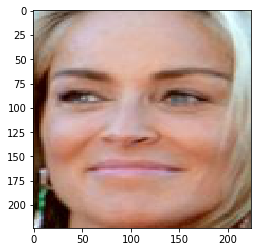

In [23]:
pixels = extract_face('sharon_stone1.jpg')
plt.imshow(pixels)
plt.show()

## How to Perform Face Identification With VGGFace2

In [24]:
model = VGGFace(model='resnet50')
print(f'Inputs: {model.inputs}')
print(f'Outputs:{model.outputs}')

Inputs: [<tf.Tensor 'input_2:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs:[<tf.Tensor 'classifier_1/Softmax:0' shape=(?, 8631) dtype=float32>]


In [26]:
samples = expand_dims(pixels.astype('float32'), axis=0)
samples = preprocess_input(samples, version=2)
yhat = model.predict(samples)
results = decode_predictions(yhat)
for result in results[0]:
    print(f'{result[0]}, {result[1]*100:.3f}')

b' Sharon_Stone', 99.642
b' Noelle_Reno', 0.085
b' Elisabeth_R\xc3\xb6hm', 0.033
b' Anita_Lipnicka', 0.026
b' Tina_Maze', 0.019


In [27]:
pixels = extract_face('channing_tatum.jpg')
samples = expand_dims(pixels.astype('float32'), axis=0)
samples = preprocess_input(samples, version=2)
yhat = model.predict(samples)
results = decode_predictions(yhat)
for result in results[0]:
    print(f'{result[0]}, {result[1]*100:.3f}')

b' Channing_Tatum', 94.433
b' Eoghan_Quigg', 0.146
b' Les_Miles', 0.113
b' Ibrahim_Afellay', 0.072
b' Tovah_Feldshuh', 0.070


## How to Perform Face Verification With VGGFace2

In [33]:
def get_embeddings(filenames):
    faces = [extract_face(f) for f in filenames]
    samples = asarray(faces, 'float32')
    samples = preprocess_input(samples, version=2)
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    yhat = model.predict(samples)
    return yhat

def is_match(known_embedding, candidate_embedding, thresh=0.5):
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print(f'>face is a Match ({score:.3f} <= {thresh:.3f})')
    else:
        print(f'>face is NOT a Match ({score:.3f} > {thresh:.3f})')

In [34]:
filenames = [
    'sharon_stone1.jpg', 
    'sharon_stone2.jpg',
    'sharon_stone3.jpg', 
    'channing_tatum.jpg']
embeddings = get_embeddings(filenames)
sharon_id = embeddings[0]
print('Positive Tests:')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
print('Negative Tests:')
is_match(embeddings[0], embeddings[3])

Positive Tests:
>face is a Match (0.418 <= 0.500)
>face is a Match (0.295 <= 0.500)
Negative Tests:
>face is NOT a Match (0.709 > 0.500)
